In [39]:
import pandas as pd

from my_path import my_path


In [40]:
# Read the file
df = pd.read_csv(f'{my_path}/MAX86177_20230801_235809.ppg.csv', header=32)
df

,timestamp,sampleNum,tagMEAS1_PPG1,tagMEAS1_PPG2,tagMEAS1_PPG3,tagMEAS1_PPG4,tagMEAS2_PPG1,tagMEAS2_PPG2,tagMEAS2_PPG3,tagMEAS2_PPG4,...,ACCX,ACCY,ACCZ,temperature,RTC,sensor,regAddr,val,I2Caddr,Unnamed: 27
0,1690927089895.778076,1.000000e+00,0_0,0_0,0_0,0_0,0_0,2_1,2_2,2_3,...,1687.0,2592.0,2351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1690927089903.555908,2.000000e+00,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1695.0,2564.0,2366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1690927089911.333984,3.000000e+00,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1705.0,2559.0,2359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1690927089919.111816,4.000000e+00,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1693.0,2581.0,2350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1690927089926.889893,5.000000e+00,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,...,1697.0,2615.0,2361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8617,stop time,1.690927e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8618,elapsed capture time: 0h01m08s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8619,missed packet count: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8620,incorrect tag count: 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check is all the values in the timestamp column are integers
print(df['timestamp'].apply(lambda x: isinstance(x, float)).all())

# print values in the timestamp column that are not integers
print(df['timestamp'][~df['timestamp'].apply(lambda x: isinstance(x, int))])

In [41]:
# if timestamp is not numeric, convert it to numeric, if its not possible, drop the row
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])
df['timestamp']

0       1.690927e+12
1       1.690927e+12
2       1.690927e+12
3       1.690927e+12
4       1.690927e+12
            ...     
8612    1.690927e+12
8613    1.690927e+12
8614    1.690927e+12
8615    1.690927e+12
8616    1.690927e+12
Name: timestamp, Length: 8617, dtype: float64

In [ ]:
# check is all the values in the timestamp column are integers
print(df['timestamp'].apply(lambda x: isinstance(x, float)).all())

In [42]:
# count nan for each column
for col in df.columns:
    print(col, df[col].isnull().sum())

timestamp 0
sampleNum 0
tagMEAS1_PPG1 0
tagMEAS1_PPG2 0
tagMEAS1_PPG3 0
tagMEAS1_PPG4 0
tagMEAS2_PPG1 0
tagMEAS2_PPG2 0
tagMEAS2_PPG3 0
tagMEAS2_PPG4 0
MEAS1_PPG1 0
MEAS1_PPG2 0
MEAS1_PPG3 0
MEAS1_PPG4 0
MEAS2_PPG1 0
MEAS2_PPG2 0
MEAS2_PPG3 0
MEAS2_PPG4 0
ACCX 0
ACCY 0
ACCZ 0
temperature 8550
RTC 8550
sensor 8617
regAddr 8617
val 8617
I2Caddr 8617
Unnamed: 27 8617


In [43]:
# get the time between each sample
df['timestamp'].diff().unique()

array([       nan, 7.77783203, 7.77807617, 7.77758789, 7.77832031])

In [ ]:
df.describe()

In [ ]:
df.tagMEAS1_PPG1.value_counts()

In [ ]:
df[df['MEAS2_PPG1'] == df.MEAS2_PPG1.min()]

In [ ]:
# drop the min value df.MEAS1_PPG1.min()
df = df[df.MEAS1_PPG1 != df.MEAS1_PPG1.min()]
df

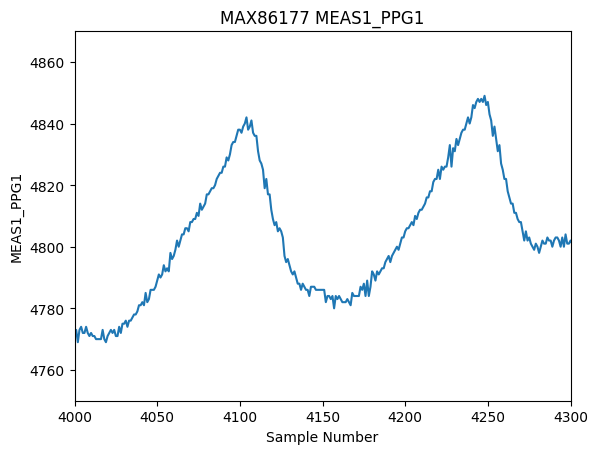

In [44]:
import matplotlib.pyplot as plt

# Plot the line plot
plt.plot(df['sampleNum'], df['MEAS1_PPG1'])
plt.title('MAX86177 MEAS1_PPG1')
plt.ylabel('MEAS1_PPG1')
plt.xlabel('Sample Number')

plt.show()

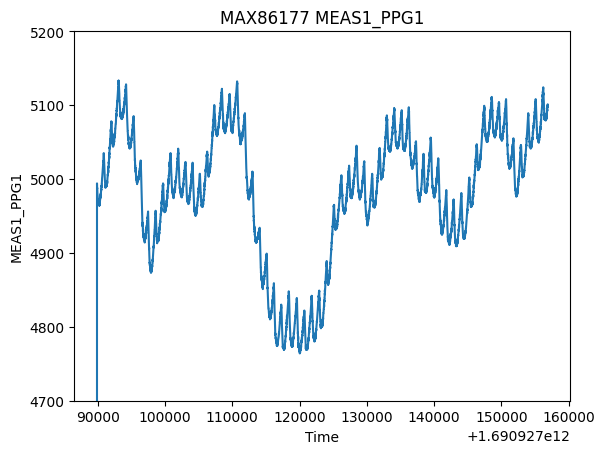

In [45]:
# Creat a line plot of MEAS1_PPG1 against the timestamp

plt.plot(df['timestamp'], df['MEAS1_PPG1'])
plt.title('MAX86177 MEAS1_PPG1')
plt.ylabel('MEAS1_PPG1')
plt.xlabel('Time')

plt.show()

In [60]:
# if MEAS1_PPG1 is 0, drop the row
df = df[df.MEAS1_PPG1 != 0]

In [47]:
# time measurement was taken
(df['timestamp'].max() - df['timestamp'].min()) / 1e9


6.700733520507812e-05

Text(0.5, 0, 'Time')

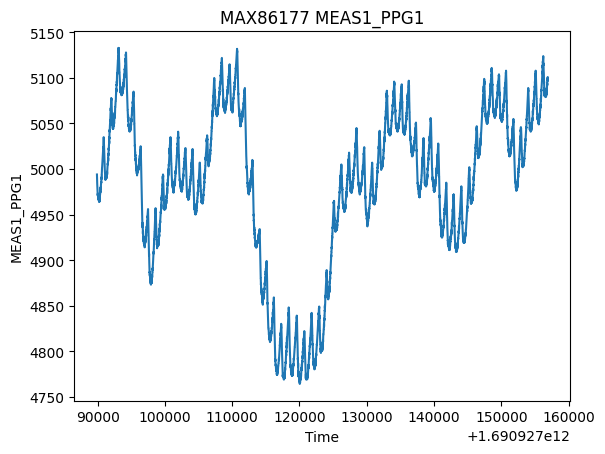

In [61]:
# Assuming you have a DataFrame named df with a column 'MEAS1_PPG1'

# Calculate the minimum and maximum values of the column
min_value = df['MEAS1_PPG1'].min()
max_value = df['MEAS1_PPG1'].max()

# Apply normalization formula to the column
df['MEAS1_PPG1_normalized'] = (df['MEAS1_PPG1'] - min_value) / (max_value - min_value)

# Plot the normalized column
plt.plot(df['timestamp'], df['MEAS1_PPG1'])
plt.title('MAX86177 MEAS1_PPG1')
plt.ylabel('MEAS1_PPG1')
plt.xlabel('Time')


!pip install plotly

In [1]:
import plotly.express as px

# Create a Plotly figure
fig = px.line(df, x='timestamp', y='MEAS1_PPG1_normalized', title='MAX86177 MEAS1_PPG1')
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='MEAS1_PPG1')

# Show the plot
fig.show()

NameError: name 'df' is not defined

[42923258.99999999+6.55518306e-10j   284601.25728754+8.28342995e+04j
  -135150.60678799-1.02228189e+05j ...   214018.66947498-2.35681052e+05j
  -135150.60678799+1.02228189e+05j   284601.25728754-8.28342995e+04j] [ 0.          0.00011606  0.00023213 ... -0.00034819 -0.00023213
 -0.00011606]


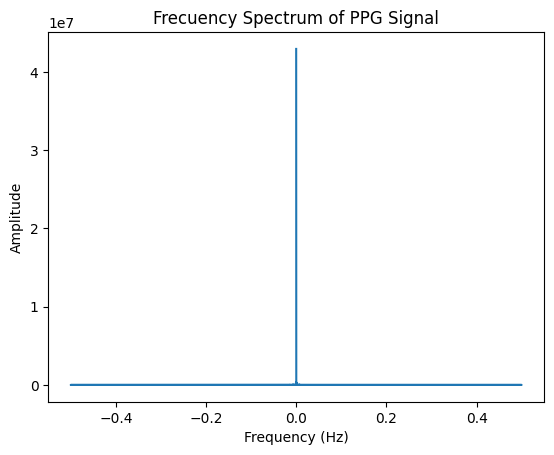

In [55]:
import numpy as np

signal_data = df['MEAS1_PPG1'].values
specturm = np.fft.fft(signal_data)
freq = np.fft.fftfreq(len(signal_data))

plt.plot(freq, np.abs(specturm))
plt.title("Frecuency Spectrum of PPG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
print(specturm, freq)



[5085.73170732+7.38020756e-14j  771.27712002+2.24483196e+02j
 -366.26180701-2.77041163e+02j ...  579.99639424-6.38702039e+02j
 -366.26180701+2.77041163e+02j  771.27712002-2.24483196e+02j] [ 0.          0.00011606  0.00023213 ... -0.00034819 -0.00023213
 -0.00011606]


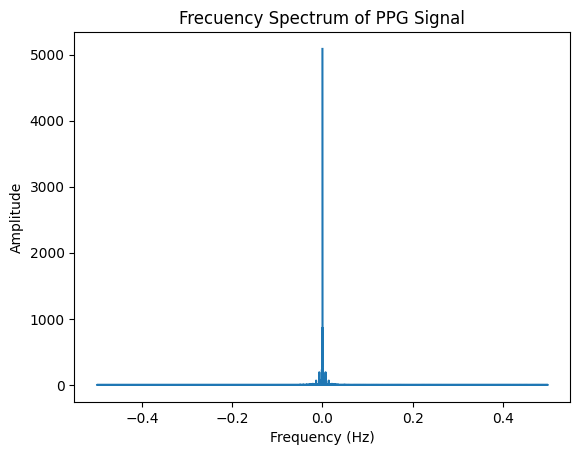

In [90]:
import numpy as np

signal_data = df['MEAS1_PPG1_normalized'].values
specturm = np.fft.fft(signal_data)
freq = np.fft.fftfreq(len(signal_data))

plt.plot(freq, np.abs(specturm))
plt.title("Frecuency Spectrum of PPG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
print(specturm, freq)


In [92]:
# spectrum2 = spectrum with max value dropped
spectrum2 = specturm[specturm != specturm.max()]
# plot

In [68]:
signal_data.min()

4764.0

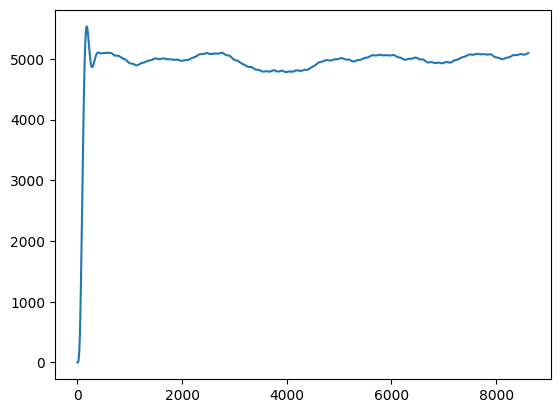

In [65]:
from scipy import signal

# Butterworth filter
b, a = signal.butter(4, 0.01, 'low', analog=False)
filtered_signal = signal.lfilter(b, a, signal_data)
# Plot the filtered signal
plt.plot(filtered_signal)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

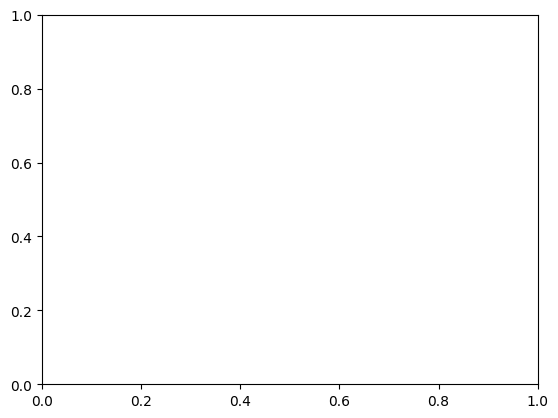

In [73]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Generate a noisy signal
t = np.linspace(0, 1, 1000)
signal_d = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.normal(size=len(t))

# Design a low-pass Butterworth filter
order = 4
cutoff_frequency = .10  # Adjust this based on your application
b, a = signal.butter(order, cutoff_frequency, 'low')

# Apply the filter
filtered_signal = signal.lfilter(b, a, signal_d)

# Plot the original and filtered signals
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Low-pass Butterworth Filter')
plt.show()


In [ ]:
import itertools

def kolmogorov_complexity(signal):
  """
  This function calculates the Kolmogorov complexity of a signal.

  Args:
    signal: The signal to be analyzed.

  Returns:
    The Kolmogorov complexity of the signal.
  """

  # Initialize the minimum description length.
  min_description_length = float("inf")

  # Iterate over all possible descriptions of the signal.
  for description in all_possible_descriptions(signal):
    # Calculate the length of the description.
    description_length = len(description)

    # If the description is shorter than the minimum description length, update the minimum description length.
    if description_length < min_description_length:
      min_description_length = description_length

  # Return the minimum description length.
  return min_description_length


def all_possible_descriptions(signal):
  """
  This function generates all possible descriptions of a signal.

  Args:
    signal: The signal to be analyzed.

  Returns:
    A list of all possible descriptions of the signal.
  """

  # Initialize the list of all possible descriptions.
  all_possible_descriptions = []

  # Iterate over all possible lengths of descriptions.
  for length in range(len(signal)):
    # Iterate over all possible combinations of symbols for each length.
    for combination in itertools.combinations(signal, length):
      # Add the combination to the list of all possible descriptions.
      all_possible_descriptions.append(combination)

  # Return the list of all possible descriptions.
  return all_possible_descriptions